In [2]:
import sys
import os
sys.path.append(os.path.abspath(".."))

import matplotlib.pyplot as plt
import pandas as pd
from util.flatten_evaluation_items import flatten_evaluation_items
import json
import numpy as np
from constants.visualization_defaults import FIG_SIZE, FONT_SIZE_PARAMS

plt.rcParams.update(FONT_SIZE_PARAMS) 

In [3]:
def get_full_evaluation_data(dataset):
    conf_learn_fkdn_results_path = f'../../results/evaluation_{dataset}/conf_learn_fkdn_evaluation.json'
    cvcf_results_path = f'../../results/evaluation_{dataset}/cvcf.json'
    harf_results_path = f'../../results/evaluation_{dataset}/harf.json'

    with open(conf_learn_fkdn_results_path, "r") as f:
        conf_learn_fkdn_data = json.load(f)

    with open(cvcf_results_path, "r") as f:
        cvcf_data = json.load(f)

    with open(harf_results_path, "r") as f:
        harf_data = json.load(f)

    full_data = conf_learn_fkdn_data + cvcf_data + harf_data
    full_data = [flatten_evaluation_items(data) for data in full_data]

    df = pd.DataFrame(full_data)
    
    lookup = {
        'conf_learn': 'Confident Learning',
        'fkdn': 'FKDN',
        'cvcf': 'CVCF',
        'harf': 'HARF',
        'arguable_conf_learn': 'Binary Confident Learning Adjustment',
    }

    df['detector'] = df['detector'].replace(lookup)

    custom_order = ['Confident Learning', 'Binary Confident Learning Adjustment', 'FKDN', 'CVCF', 'HARF']
    df['detector'] = pd.Categorical(df['detector'], categories=custom_order, ordered=True)
    df = df.sort_values('detector')

    return df

In [4]:
column_mapping = {
    "cleaning_precision": "Precision",
    "cleaning_recall": "Recall",
    "cleaning_f1": "F1 Score",
    "cleaning_f05": "F0.5 Score",
    "cleaning_pon": "Precision over Noise"
}



In [5]:
names = [
    'RF',
    'Tree',
    'LSVC'
]

custom_colors = {
    'Confident Learning': '#1f77b4',  
    'Binary Confident Learning Adjustment': '#17becf',  
    'FKDN': '#ff7f0e',  
    'CVCF': '#2ca02c',  
    'HARF': '#d62728',  
}

def create_results_plot(datasets, axes, fig, names=names):
    legend_handles = {} 

    for dataset_idx, dataset in enumerate(datasets):
        values = dataset[["cleaning_precision", "cleaning_recall", "cleaning_f1", "cleaning_f05", "detector"]]
        values = values.rename(columns=column_mapping)
        values.set_index('detector', inplace=True)

        ax = axes[dataset_idx]
        x = np.arange(len(values.columns)) 
        total_width = 0.8
        bar_width = total_width / len(values)

        for i, (detector, row) in enumerate(values.iterrows()):
            color = custom_colors.get(detector, f"C{i}")
            bars = ax.bar(x + i * bar_width, row.values, width=bar_width, label=detector, color=color)
            legend_handles[detector] = bars[0]

        averaged_noise_rate = dataset["noise_rate"].mean()
        ax.set_title(f"Teacher Model: {names[dataset_idx]} \n Noise Rate {(averaged_noise_rate*100):.2f}%")
        ax.set_xlabel("Evaluation Measure")
        ax.set_xticks(x + total_width/2 - bar_width/2)
        ax.set_xticklabels(values.columns)
        ax.tick_params(axis='x', labelrotation=90)
        ax.set_ylim(0, 1)
        ax.grid(True, axis='y')

    fig.legend(legend_handles.values(), legend_handles.keys(), loc='upper center', bbox_to_anchor=(0.5, -0.02), ncol=4)

# Music

In [6]:
evaluation_data = get_full_evaluation_data('music')

evaluation_data = evaluation_data[evaluation_data["detector"] != 'Binary Confident Learning Adjustment']

rf_corrupted_datasets = evaluation_data[evaluation_data["dataset"].str.contains("rf")]
svm_corrupted_datasets = evaluation_data[evaluation_data["dataset"].str.contains("svm")]
tree_corrupted_datasets = evaluation_data[evaluation_data["dataset"].str.contains("tree")]

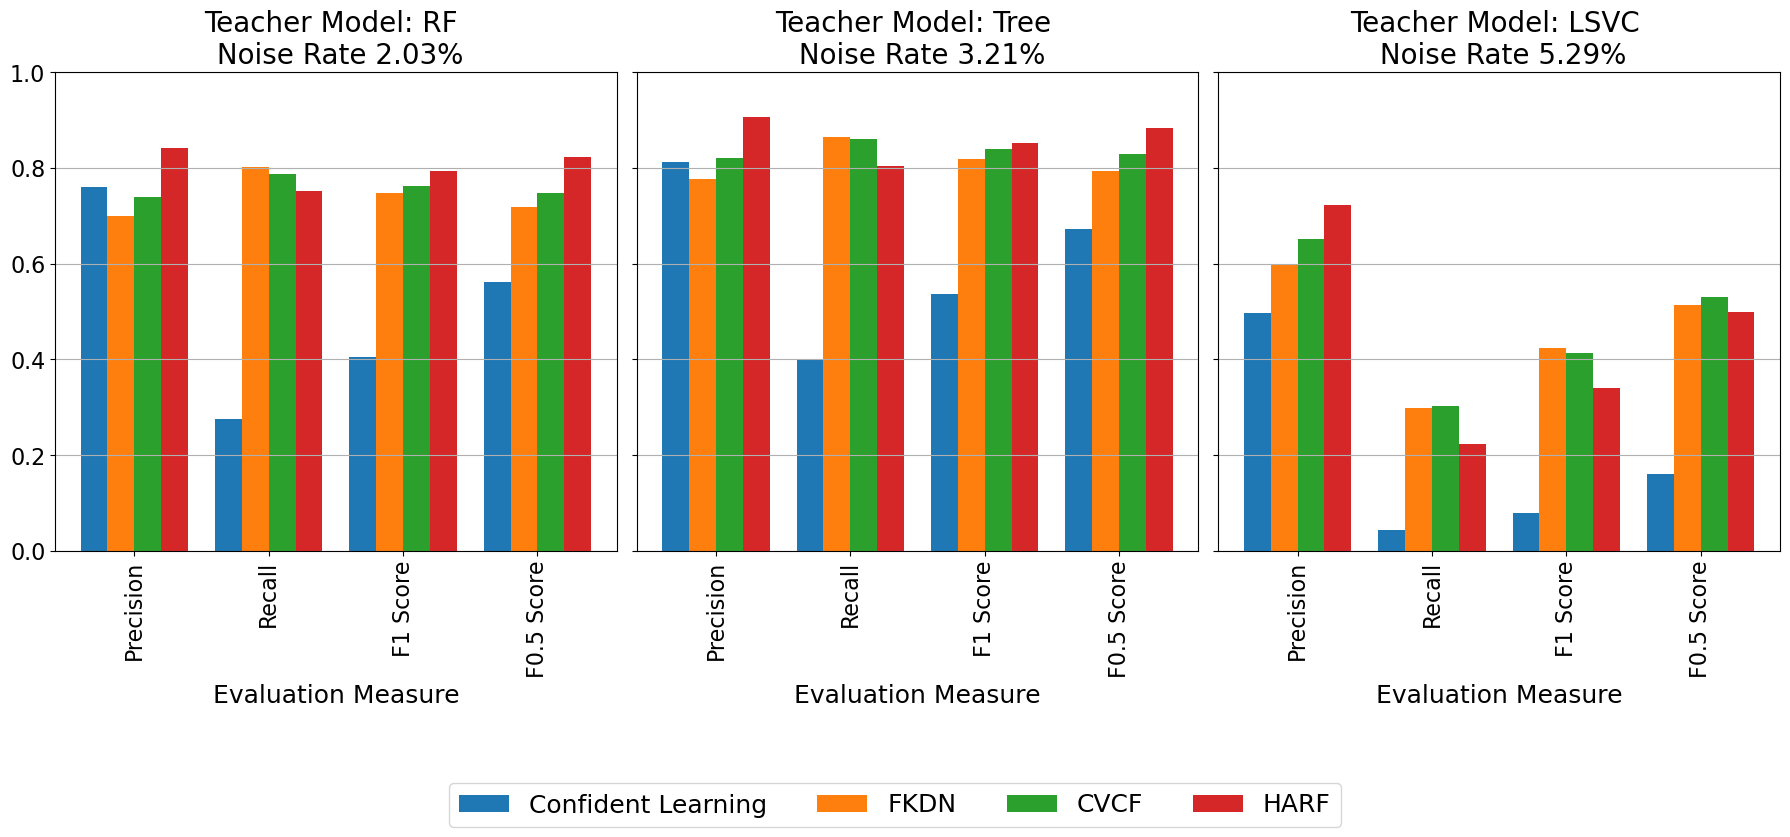

In [7]:
datasets = [
    rf_corrupted_datasets,
    tree_corrupted_datasets,
    svm_corrupted_datasets
]


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=FIG_SIZE, sharey=True)

create_results_plot(datasets, axes, fig)

plt.tight_layout(rect=[0, 0.04, 1, 0.95]) 
plt.show()


# WDC-almser

In [8]:
evaluation_data = get_full_evaluation_data('wdc_almser')

evaluation_data = evaluation_data[evaluation_data["detector"] != 'Binary Confident Learning Adjustment']

rf_corrupted_datasets = evaluation_data[evaluation_data["dataset"].str.contains("rf")]
svm_corrupted_datasets = evaluation_data[evaluation_data["dataset"].str.contains("svm")]
tree_corrupted_datasets = evaluation_data[evaluation_data["dataset"].str.contains("tree")]

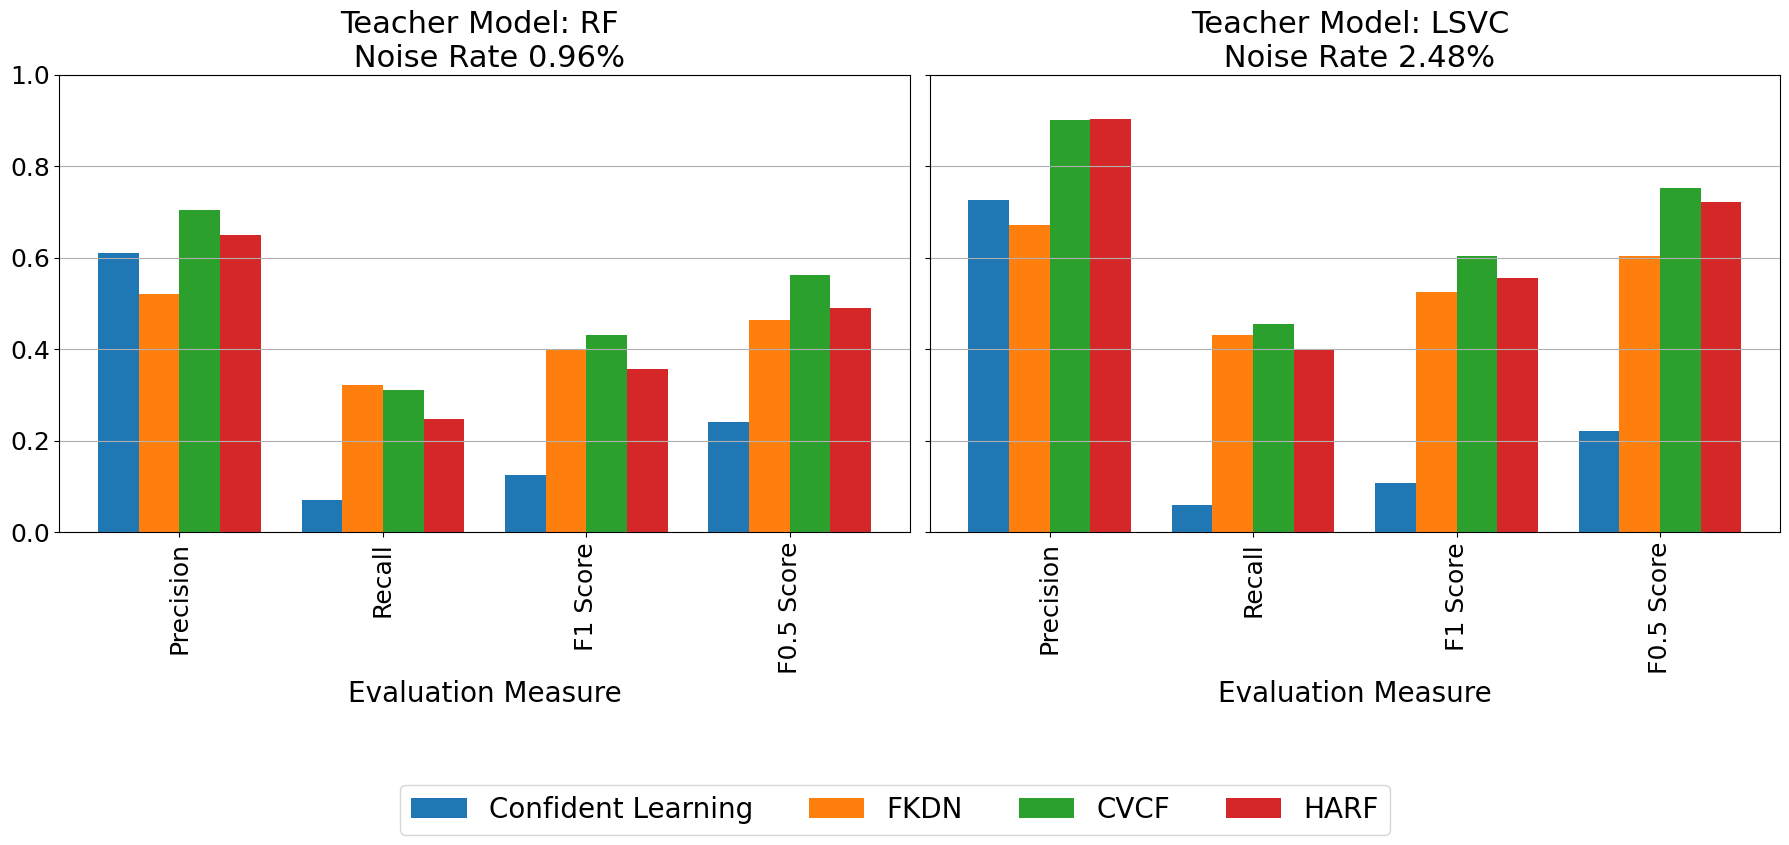

In [9]:
datasets = [
    rf_corrupted_datasets,
    svm_corrupted_datasets
]

plt.rcParams.update({
    'axes.titlesize': 22,   
    'axes.labelsize': 20,   
    'xtick.labelsize': 18,  
    'ytick.labelsize': 18,  
    'legend.fontsize': 20   
}) 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=FIG_SIZE, sharey=True)

create_results_plot(datasets, axes, fig, names=["RF", "LSVC"])

plt.tight_layout(rect=[0, 0.04, 1, 0.95]) 
plt.show()


# Dexter

In [10]:
plt.rcParams.update(FONT_SIZE_PARAMS) 

In [11]:
evaluation_data = get_full_evaluation_data('dexter')

evaluation_data = evaluation_data[evaluation_data["detector"] != 'Binary Confident Learning Adjustment']

rf_corrupted_datasets = evaluation_data[evaluation_data["dataset"].str.contains("rf")]
svm_corrupted_datasets = evaluation_data[evaluation_data["dataset"].str.contains("svm")]
tree_corrupted_datasets = evaluation_data[evaluation_data["dataset"].str.contains("tree")]

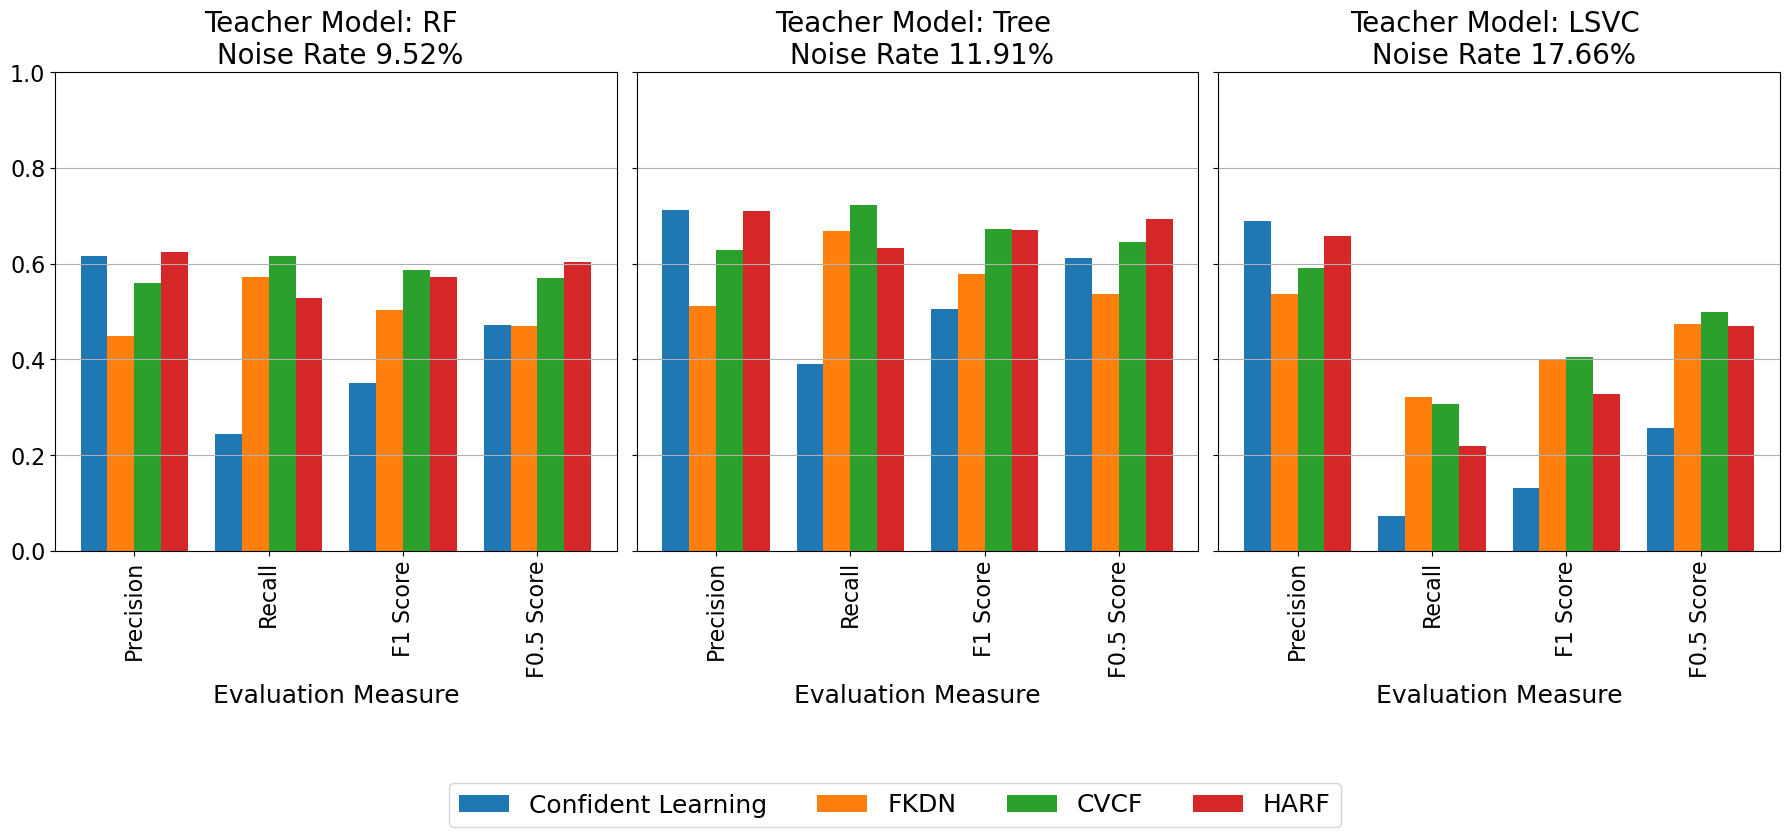

In [12]:
datasets = [
    rf_corrupted_datasets,
    tree_corrupted_datasets,
    svm_corrupted_datasets
]


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=FIG_SIZE, sharey=True)

create_results_plot(datasets, axes, fig)

plt.tight_layout(rect=[0, 0.04, 1, 0.95]) 
plt.show()


# Music with Binary Conf Learn Adjustment

In [13]:
plt.rcParams.update({
    'axes.titlesize': 24,   
    'axes.labelsize': 22,   
    'xtick.labelsize': 20,  
    'ytick.labelsize': 20,  
    'legend.fontsize': 22   
}) 

evaluation_data = get_full_evaluation_data('music')

rf_corrupted_datasets = evaluation_data[evaluation_data["dataset"].str.contains("rf")]
svm_corrupted_datasets = evaluation_data[evaluation_data["dataset"].str.contains("svm")]
tree_corrupted_datasets = evaluation_data[evaluation_data["dataset"].str.contains("tree")]

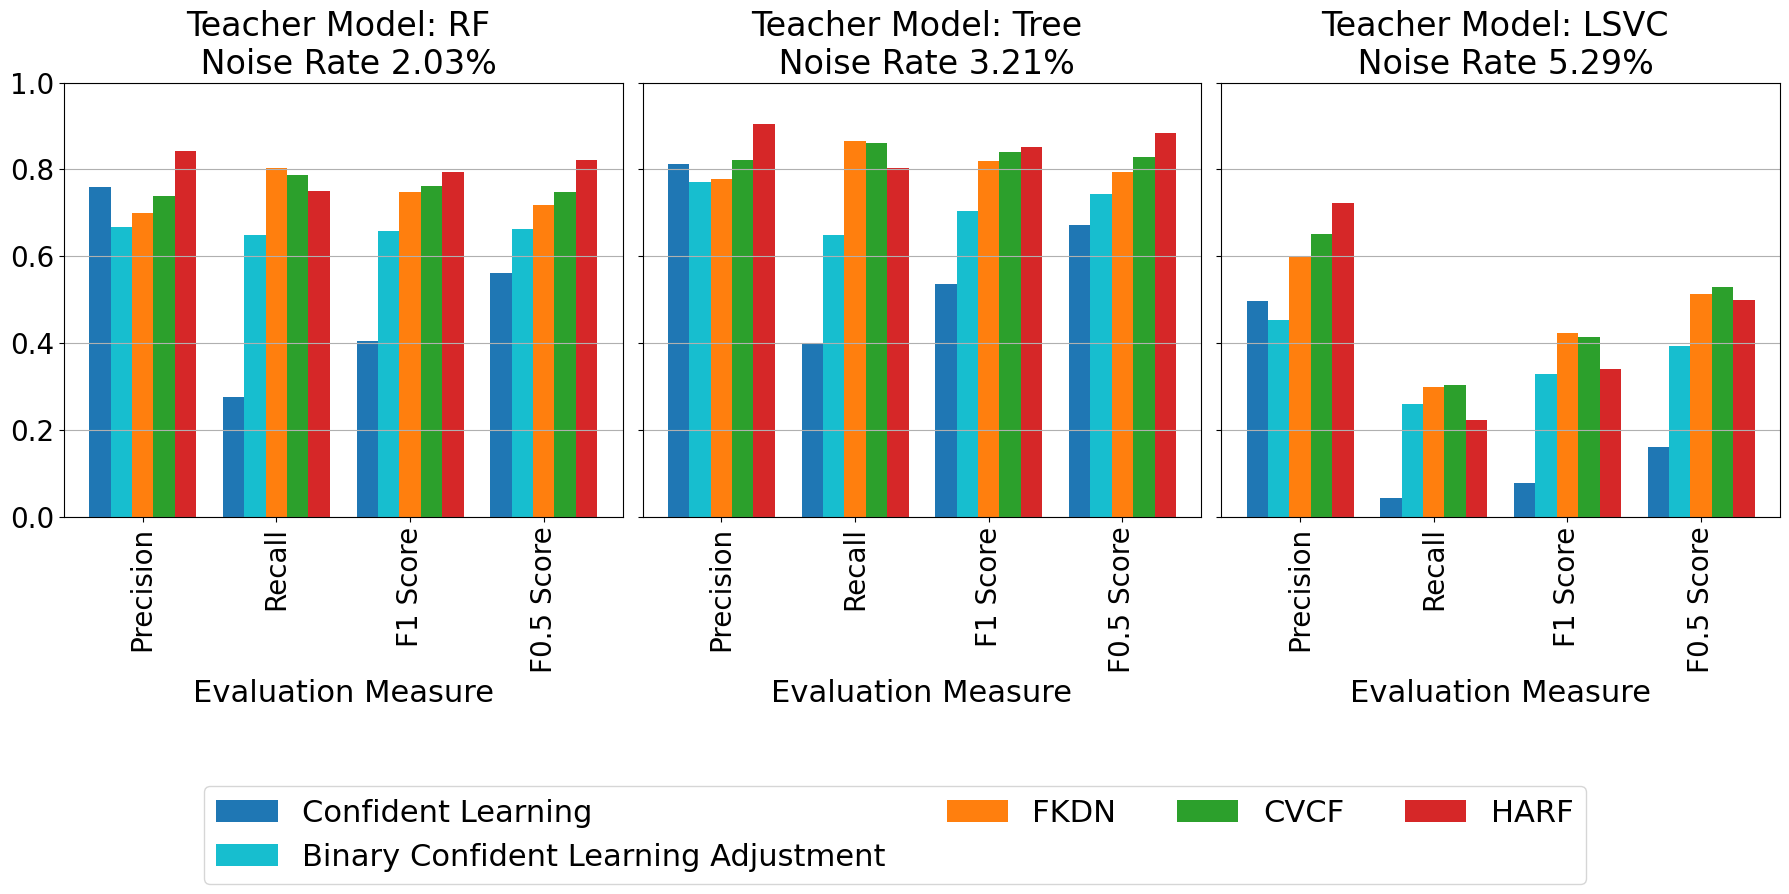

In [14]:
datasets = [
    rf_corrupted_datasets,
    tree_corrupted_datasets,
    svm_corrupted_datasets
]


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=FIG_SIZE, sharey=True)

create_results_plot(datasets, axes, fig)

plt.tight_layout(rect=[0, 0.04, 1, 0.95]) 
plt.show()
